Streaming output truncated to the last 5000 lines.
BUS_03834    25
BUS_03425    25
BUS_01263    25
BUS_05444    25
BUS_03794    25
BUS_00936    25
BUS_06523    25
BUS_05222    25
BUS_00959    25
BUS_02749    25
BUS_03785    25
BUS_04707    25
BUS_06086    25
BUS_04598    25
BUS_01425    25
BUS_02823    25
BUS_05286    25
BUS_00247    25
BUS_05319    25
BUS_06564    25
BUS_03597    25
BUS_02842    25
BUS_06064    25
BUS_00642    25
BUS_01974    25
BUS_06685    25
BUS_06686    25
BUS_03487    25
BUS_02892    25
BUS_03573    25
BUS_01372    25
BUS_05684    25
BUS_02999    25
BUS_01268    25
BUS_03533    25
BUS_01332    25
BUS_05367    25
BUS_06645    25
BUS_01320    25
BUS_05675    25
BUS_00023    25
BUS_02981    25
BUS_02972    25
BUS_01957    25
BUS_03279    25
BUS_06779    25
BUS_01998    25
BUS_06788    25
BUS_03210    25
BUS_06838    25
BUS_03174    24
BUS_03254    24
BUS_00032    24
BUS_00031    24
BUS_00038    24
BUS_00019    24
BUS_06268    24
BUS_01713    24
BUS_01704    24
BUS_0

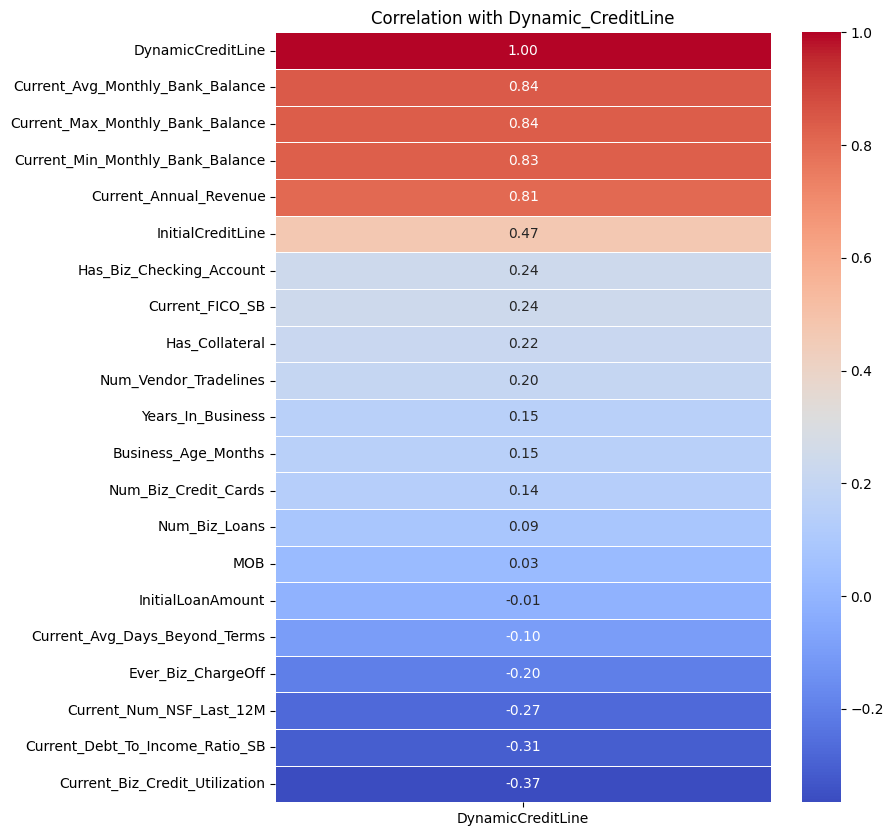


4. Outliers in Credit Data:

Outliers are data points that significantly deviate from the rest of the data. In credit data, outliers can represent unusual applicant profiles or errors in data entry. They can skew statistical analyses and affect machine learning model performance.

5. Finding Outliers with Cross Tables:

While cross tables primarily show relationships between categorical variables, unusual distributions within categories might hint at outliers in related numerical variables.
For example, if a specific category has a very high or low average loan amount compared to others, it could indicate potential outliers.

Value Frequency of Binary Columns:

Value counts for binary column 'Has_Biz_Checking_Account':
Has_Biz_Checking_Account
1    99033
0    25403
Name: count, dtype: int64

Value counts for binary column 'Has_Collateral':
Has_Collateral
1    88782
0    35654
Name: count, dtype: int64

Value counts for binary column 'Ever_Biz_ChargeOff':
Ever_Biz_ChargeOff
0    96746


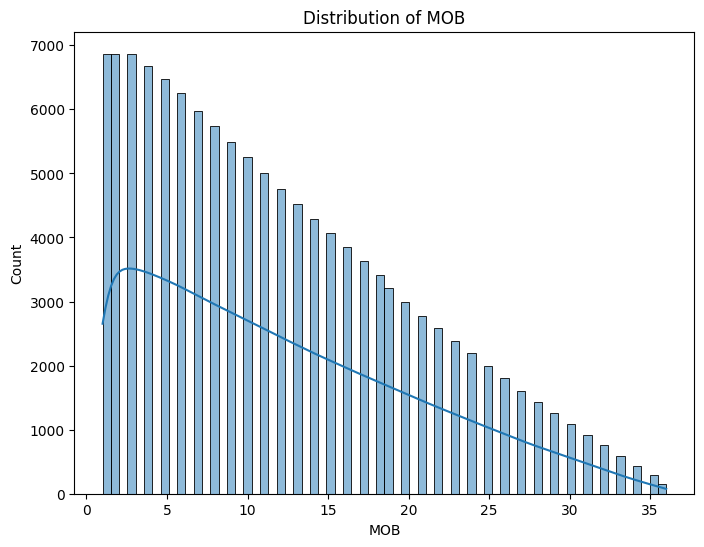

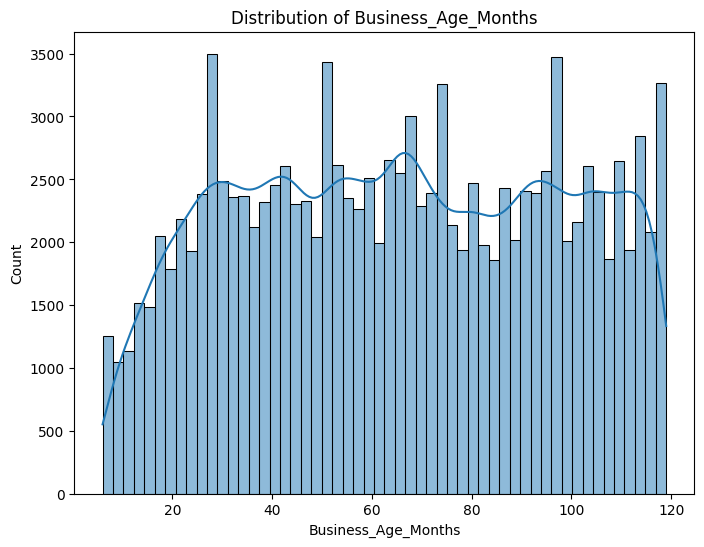

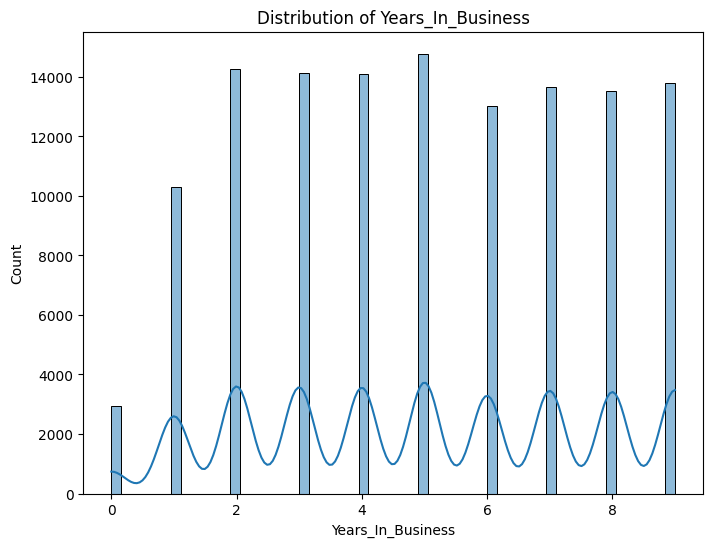


Skipping box plot for 'Has_Biz_Checking_Account' as it is binary.


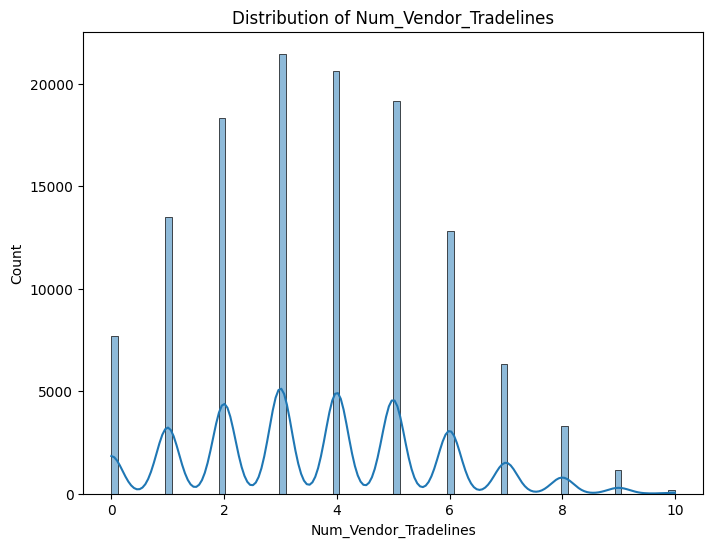

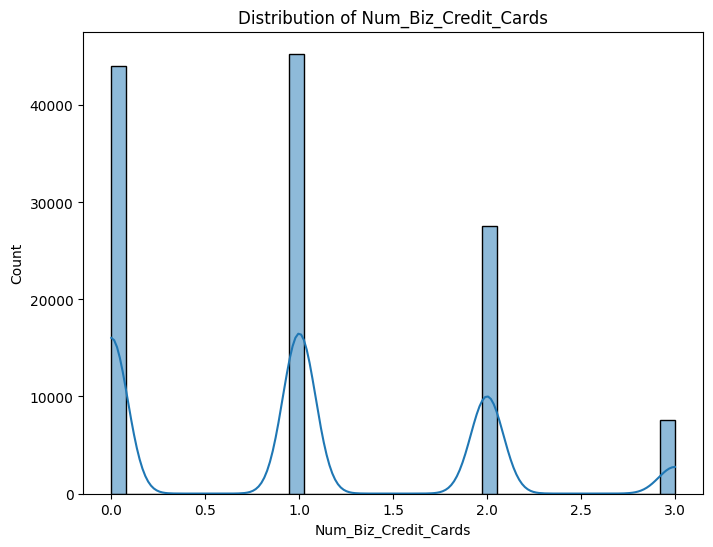

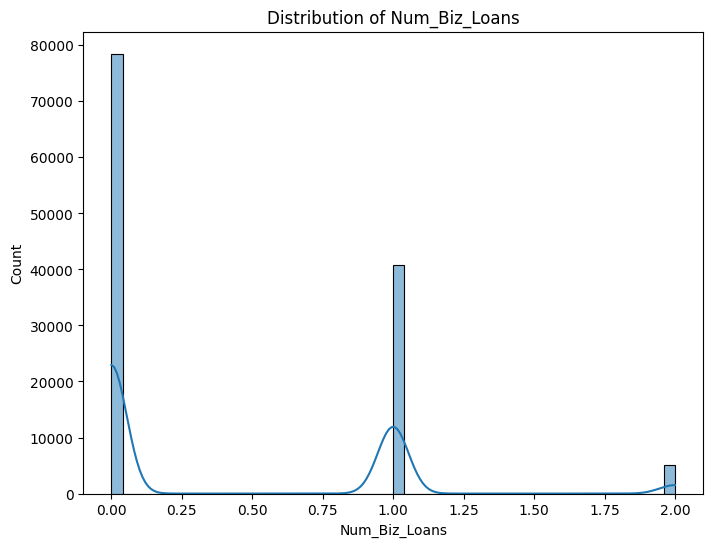

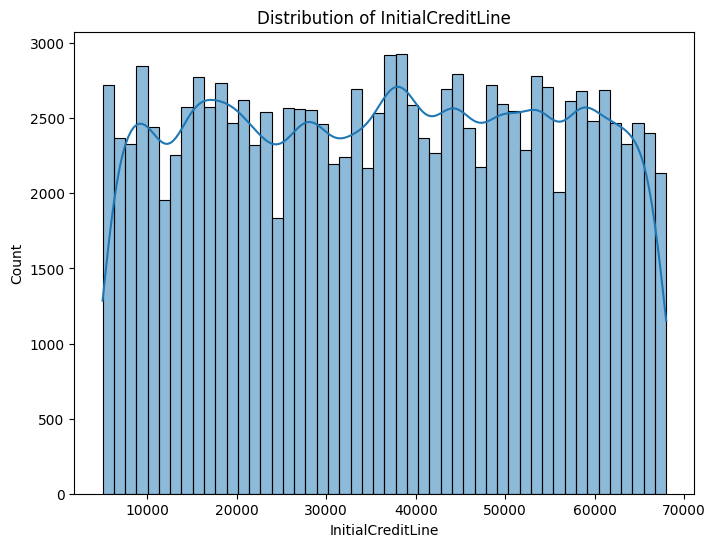

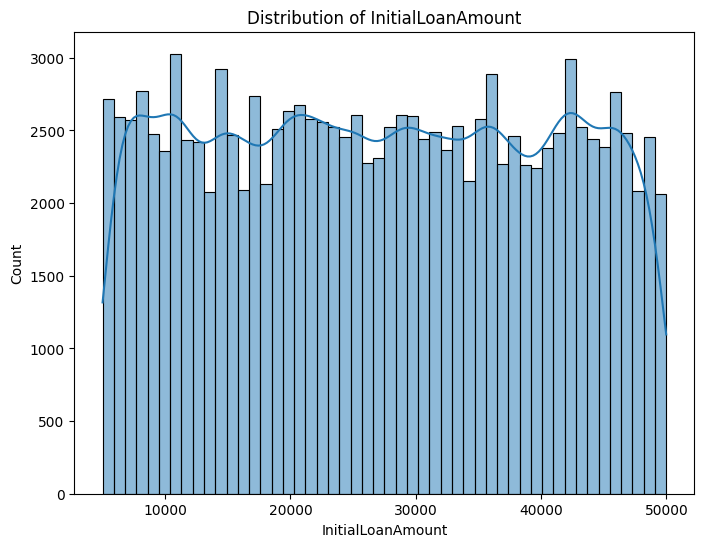


Skipping box plot for 'Has_Collateral' as it is binary.


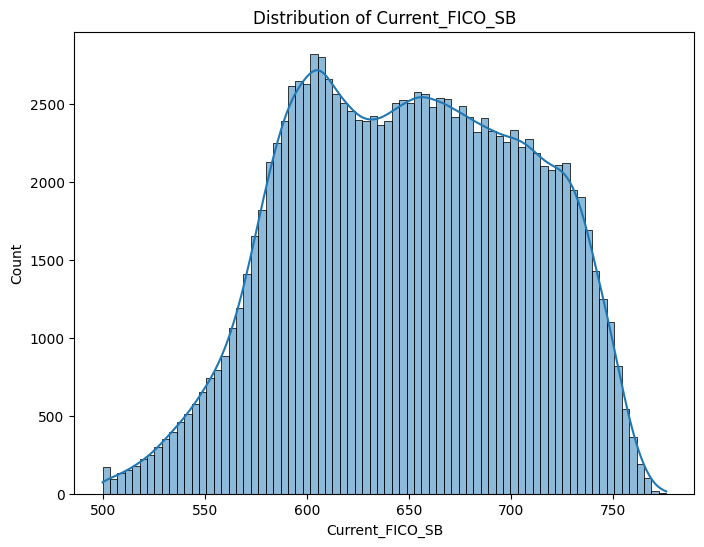

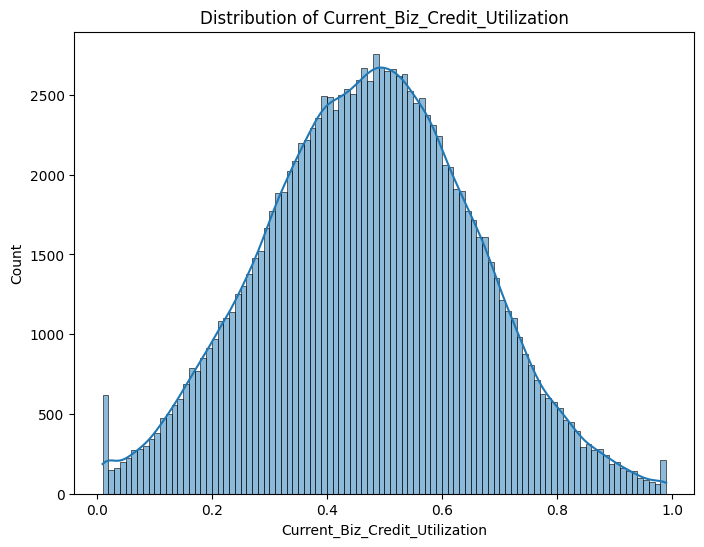

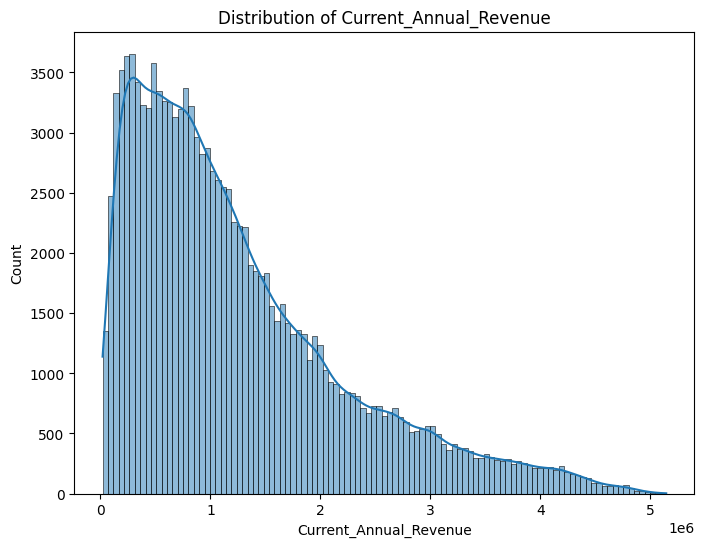

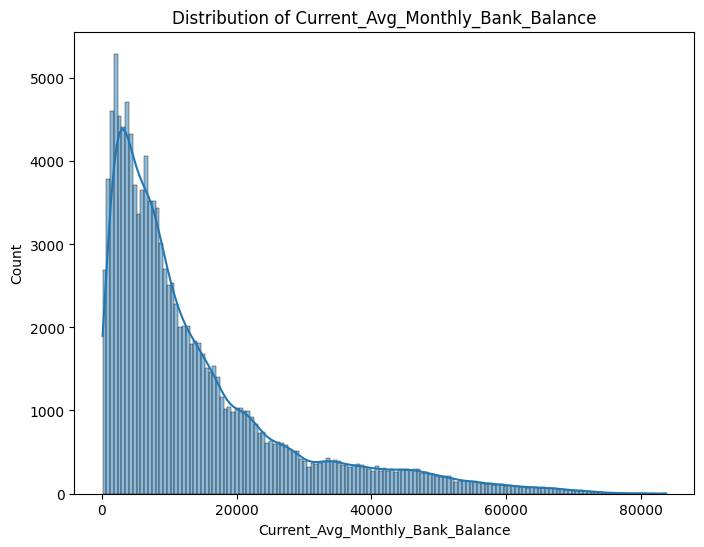

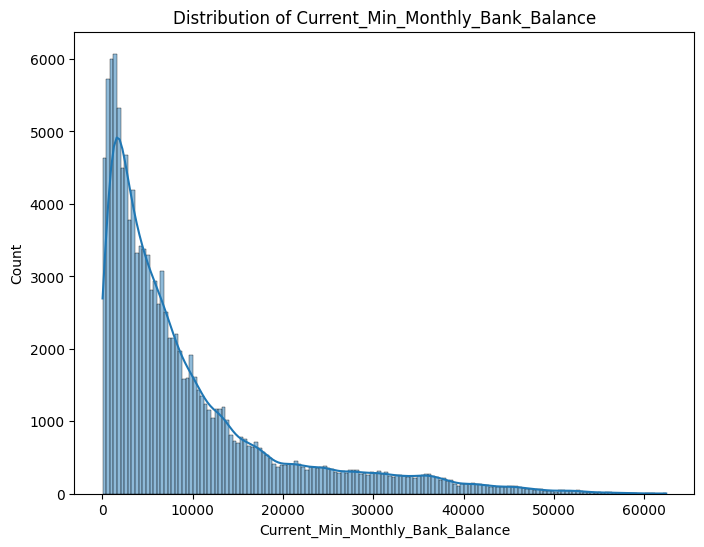

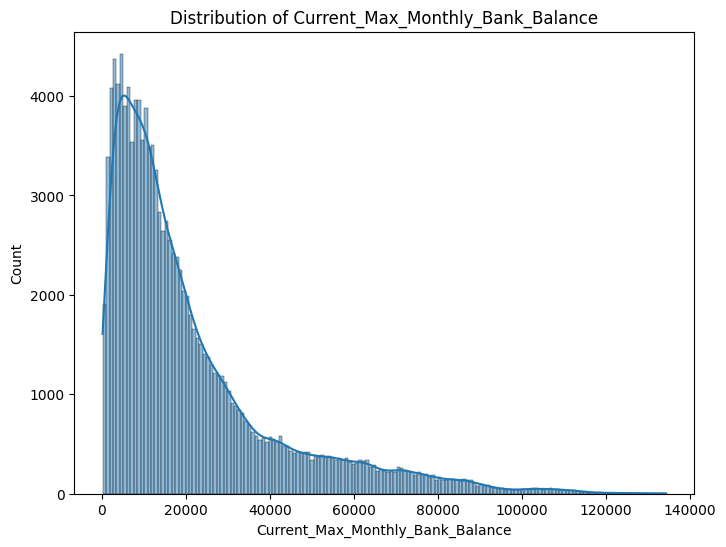

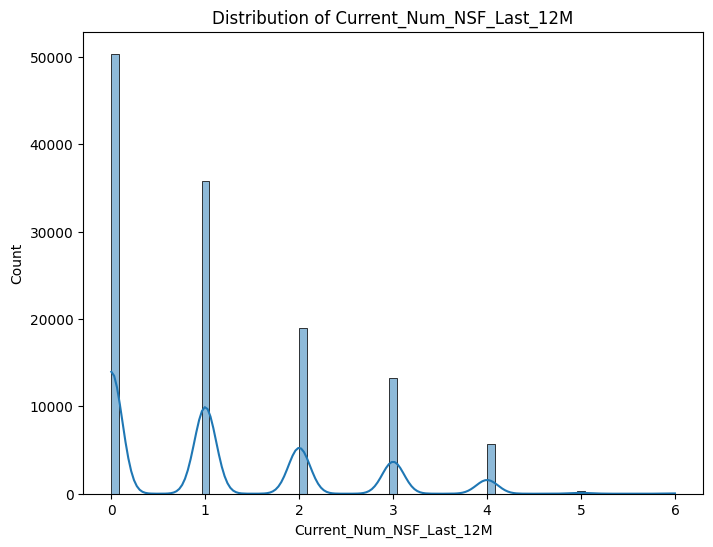

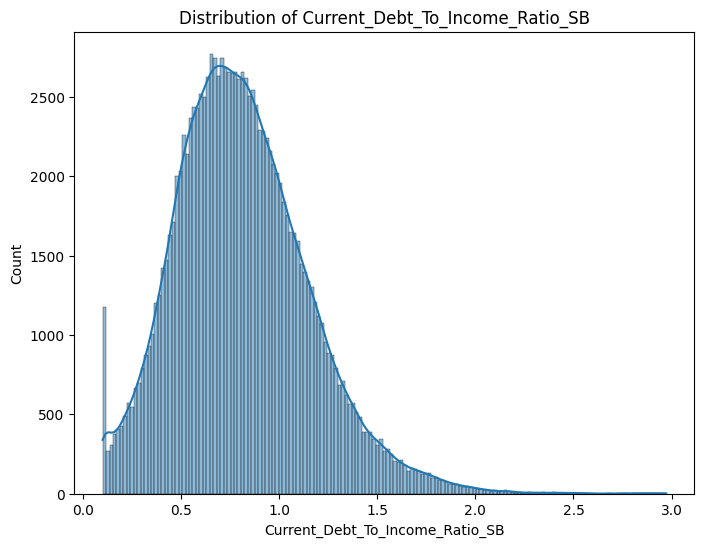

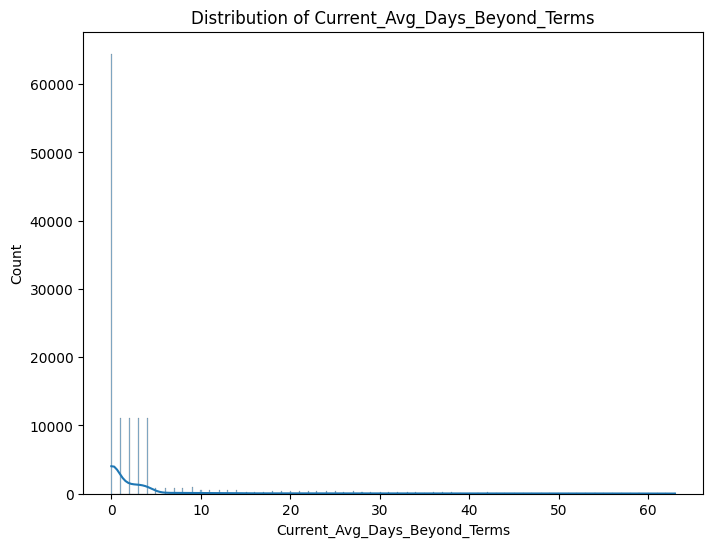


Skipping box plot for 'Ever_Biz_ChargeOff' as it is binary.


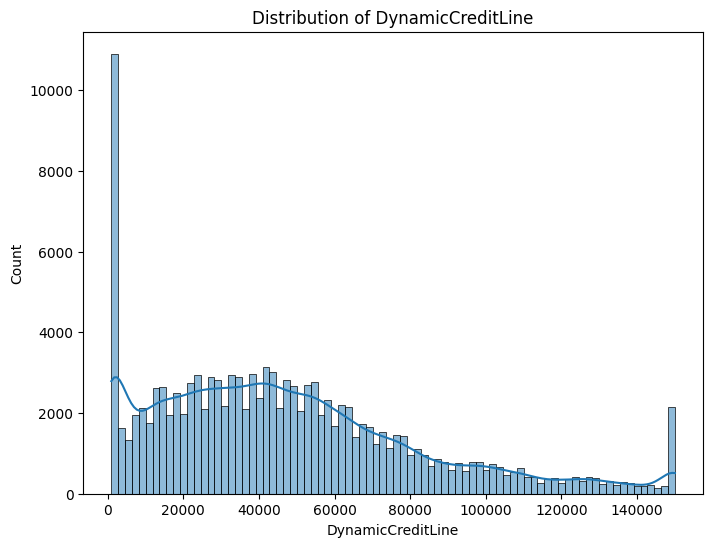


For column with null values like Collateral_Type, the histogram only distibution for populated values

Histogram is great to give overview for how values are distributed, but need 1.5Q Method to effetively identify outliner

6.Identifying Outliers using IQR Method (Non-Binary Columns):

No significant outliers found in 'MOB' using IQR method.

No significant outliers found in 'Business_Age_Months' using IQR method.

No significant outliers found in 'Years_In_Business' using IQR method.

Skipping IQR outlier detection for binary column 'Has_Biz_Checking_Account'.

Potential outliers in 'Num_Vendor_Tradelines' (IQR method):
15739    10
15740    10
15741    10
15742    10
15743    10
Name: Num_Vendor_Tradelines, dtype: int64

No significant outliers found in 'Num_Biz_Credit_Cards' using IQR method.

No significant outliers found in 'Num_Biz_Loans' using IQR method.

No significant outliers found in 'InitialCreditLine' using IQR method.

No significant outliers found in 'InitialLoanAmount

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
# Load the credit profile data
df = pd.read_csv('/content/drive/MyDrive/Chau_ACE/Chau_Projects/ML_SMB_DynamicLine/SMB_dynamic_line_v5282025.csv')
print("Data loaded successfully!")

# --- EDA Framework ---

# Set options to display all columns and a large number of rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("\n--- EDA: Exploring Credit Risk Data ---")

# 1. Discuss the concept of consumer credit risk and define how it is calculated.
print("\n1. Credit Risk Concept and Calculation:")
print("Credit risk is the possibility of a borrower failing to repay a loan or meet their debt obligations. It's a crucial concern for lenders as it directly impacts their profitability.")
print("Credit risk assessment often involves evaluating a borrower's creditworthiness based on factors like credit history, repayment capacity, income, loan terms, and collateral.")
print("Quantifying credit risk can involve calculating metrics such as:")
print("- Probability of Default (PD%): The likelihood that a borrower will default on their debt.")
print("- Net Credit Loss ($NCL%): The total amount the lender is at risk for at the time of default.")

# 2. Explore the credit data
print("\n2. Exploring the Credit Data:")
print("\nFirst, let's get a general overview of the data:")
print(df.head())
print("\nDataframe information:")
df.info()
print("\nSummary statistics of numerical features:")
print(df.describe())
print("\nValue counts of categorical features:")
for column in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for column '{column}':")
    print(df[column].value_counts())

# 3. Crosstab and pivot tables with the target variable
print("\n3. Correlation Heatmaps with Target Variable DynamicCreditLine:")
print("\nTo simplify the analysis of correlations, we will generate a heatmap showing the correlation of all numerical variables with the target variable.")

# Assuming 'df' is your DataFrame and 'DynamicCreditLine' is your target column
target_binary = 'DynamicCreditLine'

numerical_df = df.select_dtypes(include=np.number).copy()

# Correlation with Dynamic_CreditLine
correlation_with_dynamic_creditline = numerical_df.corr()[target_binary].sort_values(ascending=False)

# Display the correlation table for DynamicCreditLine
print("\nCorrelation Table with Dynamic_CreditLine:")
print(correlation_with_dynamic_creditline.to_frame())

# Correlation heatmap for Dynamic_CreditLine
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_dynamic_creditline.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation with Dynamic_CreditLine')
plt.show()

# 4. Outliers in credit data
print("\n4. Outliers in Credit Data:")
print("\nOutliers are data points that significantly deviate from the rest of the data. In credit data, outliers can represent unusual applicant profiles or errors in data entry. They can skew statistical analyses and affect machine learning model performance.")

# 5. Finding outliers with cross tables
print("\n5. Finding Outliers with Cross Tables:")
print("\nWhile cross tables primarily show relationships between categorical variables, unusual distributions within categories might hint at outliers in related numerical variables.")
print("For example, if a specific category has a very high or low average loan amount compared to others, it could indicate potential outliers.")

print("\nValue Frequency of Binary Columns:")
for column in df.columns:
    if df[column].nunique() == 2:
        print(f"\nValue counts for binary column '{column}':")
        print(df[column].value_counts())
print("\nSome noticeable insight: 79.6% of businesses have a business checking account, 71.35% have collateral, meanwhile, 22.25% ever business charge-off, reasonable for SMB, start-up")

print("\nExamining Distributions with Histograms and KDE Plots:")
for column in numerical_df.columns:
  if numerical_df[column].nunique() > 2:
     plt.figure(figsize=(8, 6))
     sns.histplot(numerical_df[column], kde=True)
     plt.title(f'Distribution of {column}')
     plt.show()
  else:
      print(f"\nSkipping box plot for '{column}' as it is binary.")


print("\nFor column with null values like Collateral_Type, the histogram only distibution for populated values")

print("\nHistogram is great to give overview for how values are distributed, but need 1.5Q Method to effetively identify outliner")
print("\n6.Identifying Outliers using IQR Method (Non-Binary Columns):")
for column in numerical_df.columns:
    if numerical_df[column].nunique() > 2:
        Q1 = numerical_df[column].quantile(0.25)
        Q3 = numerical_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = numerical_df[column][(numerical_df[column] < lower_bound) | (numerical_df[column] > upper_bound)]
        if not outliers_iqr.empty:
            print(f"\nPotential outliers in '{column}' (IQR method):\n{outliers_iqr.head()}") # head function only shows 5 examples of the outliners
        else:
            print(f"\nNo significant outliers found in '{column}' using IQR method.")
    else:
        print(f"\nSkipping IQR outlier detection for binary column '{column}'.")

print("\n7. Removing Outliers (IQR Method, Non-Binary Columns):")
original_row_count = len(df)
rows_removed_per_column = {}
df_cleaned = df.copy()  # Create a copy of the DataFrame to avoid modifying the original during iteration

for column in numerical_df.columns:
    if numerical_df[column].nunique() > 2:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_mask = (df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)
        outlier_indices = df_cleaned[outliers_mask].index
        rows_removed = len(outlier_indices)

        if rows_removed > 0:
            df_cleaned = df_cleaned.drop(outlier_indices)
            rows_removed_per_column[column] = rows_removed
            print(f"\nRemoved {rows_removed} rows with IQR outliers in column '{column}'.")
        else:
            print(f"\nNo IQR outliers found in column '{column}'.")
    else:
        print(f"\nSkipping outlier removal for binary column '{column}'.")

print(f"\n--- Summary of Rows Removed ---")
total_rows_removed = original_row_count - len(df_cleaned)
print(f"Original number of rows: {original_row_count}")
print(f"Number of rows after outlier removal: {len(df_cleaned)}")
print(f"Total number of rows removed: {total_rows_removed}")
print("\nRows removed per column (if any):")
for column, count in rows_removed_per_column.items():
    print(f"- '{column}': {count}")

print("\nCleaned DataFrame (first 5 rows):")
print(df_cleaned.head())

# 7. Risk with missing data in loan data
print("\n8. Risk with Missing Data in Loan Data:")
print("\nMissing data is a common problem in real-world datasets. In loan data, missing values can introduce bias and reduce the accuracy of analyses and models.")
print("The risk associated with missing data depends on the extent and pattern of missingness. For example:")
print("- Missing values in crucial features like income or credit score can significantly impact credit risk assessment.")
print("- If missingness is systematic (related to other variables), it can introduce bias.")
print("- High percentages of missing values in a column might render machine learning model prediction feature unreliable.")

# 8. Replacing missing credit data
print("\n9. Replacing Missing Credit Data:")
print("\nSeveral techniques can be used to handle missing data:")
print("- Imputation: Filling missing values with estimated values (e.g., mean, median, mode).")
print("- More sophisticated imputation techniques (e.g., using machine learning models).")

print("\nLet's check for missing values:")
print(df.isnull().sum().sort_values(ascending=False))


from sklearn.model_selection import train_test_split


# Assuming your DataFrame after cleaning is named 'df_cleaned'

print("\n10. Split data into Train, Validation, and Test Data:")

# Split the data into training, validation, and test sets
train_df, temp_df = train_test_split(df_cleaned, test_size=0.3, random_state=42) # 30% go to validation-test, 70% remain for training
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)     #break-down 50/50 of 30% for validation and test

print(f"Training data shape: {train_df.shape}")
print(f"Validation data shape: {val_df.shape}")
print(f"Test data shape: {test_df.shape}")

print("\n--- Explanation of Data Splitting ---")
print("""
We split our data into three distinct datasets: training, validation, and test. This is a fundamental practice in machine learning to build robust and reliable models.

**1. Training Data:**
   - This is the largest portion of our data and the one that the machine learning model directly learns from.
   - The model will adjust its internal parameters based on the patterns and relationships it finds in the training data.
   - Think of it as the 'textbook' the model studies to understand the underlying concepts.

**2. Validation Data:**
   - This dataset is used to tune the model's hyperparameters and to get an unbiased estimate of the model's performance *during* the training process.
   - Hyperparameters are settings of the model that are not learned from the data but are set prior to training (e.g., the learning rate of an algorithm, the depth of a decision tree).
   - By evaluating the model on the validation set after each training epoch or after trying different hyperparameter settings, we can see how well the model generalizes to unseen data and avoid overfitting (where the model learns the training data too well and performs poorly on new data).
   - The validation set acts as a 'practice exam' that helps us make adjustments to the model before the final evaluation.

**3. Test Data:**
   - This is a completely separate dataset that the model *never* sees during the training or hyperparameter tuning phases.
   - It serves as the final, unbiased evaluation of the model's performance on completely new, unseen data.
   - The test set simulates how well the model would perform in a real-world scenario.
   - We only evaluate the model on the test set *once*, after we have finalized our model through training and validation.
   - Think of the test set as the 'final exam' that gives us a true measure of the model's capabilities.

By using this three-way split, we can build a model that not only learns from the data but also generalizes well to new data and provides a reliable estimate of its real-world performance.
""")

# Impute missing Collateral_Type in the training data with a special value (e.g., 0)
special_collateral_value = 'Unknown'
train_df['Collateral_Imputed'] = train_df['Collateral_Type'].fillna(special_collateral_value)

# Verify the imputation in the training data
print("\nMissing Collateral values in training data before imputation:", train_df['Collateral_Type'].isnull().sum())
print("Missing Collateral values in training data after imputation:", train_df['Collateral_Imputed'].isnull().sum())
print("First few rows of training data with imputed Collateral:")
print(train_df[['Collateral_Type', 'Collateral_Imputed', 'BusinessID']].head())

# For demonstration, let's also do the same for validation and test sets *independently*
# In a real project, you would apply the *same* special value to these as well.
val_df['Collateral_Imputed'] = val_df['Collateral_Type'].fillna(special_collateral_value)
test_df['Collateral_Imputed'] = test_df['Collateral_Type'].fillna(special_collateral_value)

print("\nMissing Collateral values in validation data after imputation:", val_df['Collateral_Imputed'].isnull().sum())
print("Missing Collateral values in test data after imputation:", test_df['Collateral_Imputed'].isnull().sum())

#\nNow check DynamicCreditLine rate in train data
print("\nValue Frequency of DynamicCreditLine in Train Data:")
for column in train_df.columns:
    if column == 'DynamicCreditLine':
        print(f"\nValue counts for DynamicCreditLine '{column}':")
        print(train_df[column].value_counts())
print("\nSome noticeable insight: ")

###### END of EDA #######


--- Average Credit Line by Industry Type ---
                                    count          mean   median   min     max
Industry_Type                                                                 
Educational Service                  5423  18394.338927  15500.0  1000   68000
Heath Care & Social Assistance       6493  27101.955953  25500.0  1000   92000
Unknown Industry                     6960  27980.244253  25500.0  1000   74500
Art, Entertainment, and Recreation   6552  30480.692918  28500.0  1000   85500
Restaurant                           5685  33704.485488  32000.0  1000  103500
Retail Trade, Specialty              6686  34201.241400  34500.0  1000   99000
Transportation (Non-Trucking)        6264  36084.530651  35000.0  1000  106000
Other Service (No Non-Profit)        6187  40393.728786  40500.0  1000   99500
Food Manufacturing                   5545  41366.816952  41500.0  1000  110000
Finance & Insurance                  5152  41839.188665  41500.0  1000  111000
Inform

<ipython-input-2-afa6650d4f86>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_credit_stats.reset_index(), x='Industry_Type', y='mean', palette='viridis')


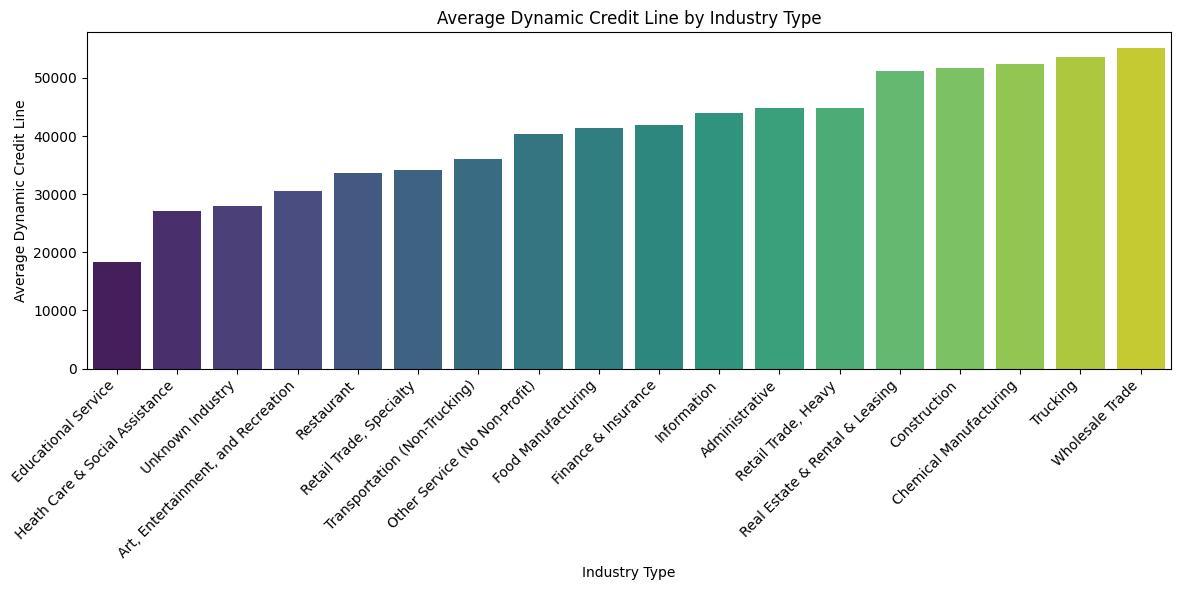

In [2]:
# Ensure 'Industry_Type' and 'DynamicCreditLine' exist
if 'Industry_Type' in df_cleaned.columns and 'DynamicCreditLine' in df_cleaned.columns:

    # Group by Industry_Type and calculate average DynamicCreditLine
    industry_credit_stats = (
        df_cleaned.groupby('Industry_Type')['DynamicCreditLine']
        .agg(['count', 'mean', 'median', 'min', 'max'])
        .sort_values(by='mean', ascending=True)
    )

    print("\n--- Average Credit Line by Industry Type ---")
    print(industry_credit_stats)

    # Plotting the average DynamicCreditLine per industry_type
    plt.figure(figsize=(12, 6))
    sns.barplot(data=industry_credit_stats.reset_index(), x='Industry_Type', y='mean', palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Average Dynamic Credit Line')
    plt.xlabel('Industry Type')
    plt.title('Average Dynamic Credit Line by Industry Type')
    plt.tight_layout()
    plt.show()

else:
    print("Either 'industry_type' or 'DynamicCreditLine' is missing in your DataFrame.")



Initial Features: ['MOB', 'Business_Age_Months', 'Years_In_Business', 'Industry_Type', 'Has_Biz_Checking_Account', 'Num_Vendor_Tradelines', 'Num_Biz_Credit_Cards', 'Num_Biz_Loans', 'InitialCreditLine', 'InitialLoanAmount', 'Loan_Purpose', 'Has_Collateral', 'Collateral_Type', 'Current_FICO_SB', 'Current_Biz_Credit_Utilization', 'Current_Annual_Revenue', 'Current_Avg_Monthly_Bank_Balance', 'Current_Min_Monthly_Bank_Balance', 'Current_Max_Monthly_Bank_Balance', 'Current_Num_NSF_Last_12M', 'Current_Debt_To_Income_Ratio_SB', 'Current_Avg_Days_Beyond_Terms', 'Ever_Biz_ChargeOff']

Updated Features: ['MOB', 'Business_Age_Months', 'Years_In_Business', 'Has_Biz_Checking_Account', 'Num_Vendor_Tradelines', 'Num_Biz_Credit_Cards', 'Num_Biz_Loans', 'InitialCreditLine', 'InitialLoanAmount', 'Loan_Purpose', 'Has_Collateral', 'Collateral_Type', 'Current_FICO_SB', 'Current_Biz_Credit_Utilization', 'Current_Annual_Revenue', 'Current_Avg_Monthly_Bank_Balance', 'Current_Min_Monthly_Bank_Balance', 'Curren

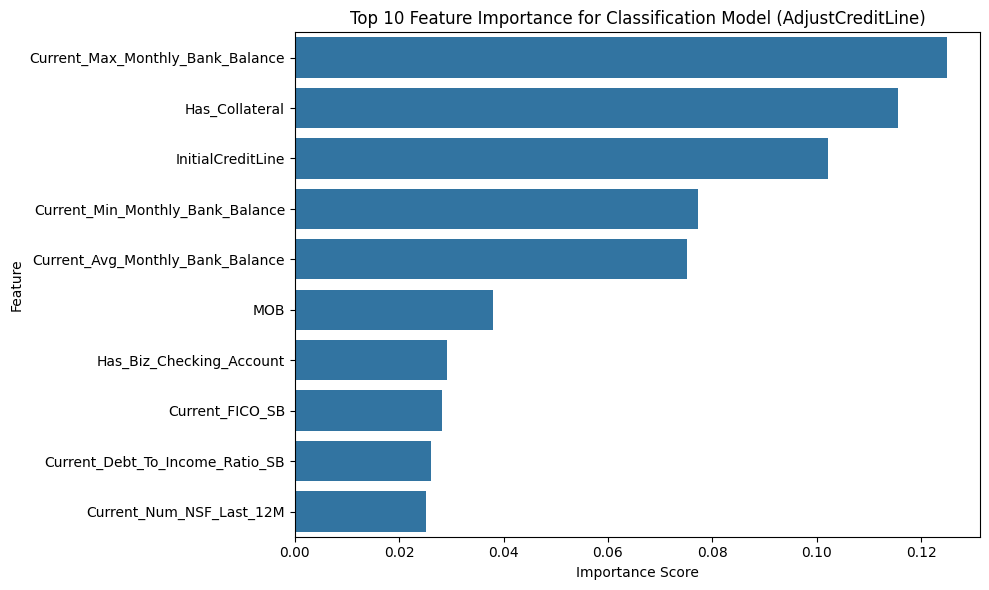


Number of BusinessIDs with unstable Collateral_Type (changes over months): 0

No BusinessIDs with unstable Collateral_Type detected.

Regression Model Evaluation (Validation Set):
Mean Absolute Error (MAE): 1436.65
Root Mean Squared Error (RMSE): 1844.76
R² Score: 0.9967

Regression Model Evaluation (Test Set):
Mean Absolute Error (MAE): 1441.45
Root Mean Squared Error (RMSE): 1854.00
R² Score: 0.9968


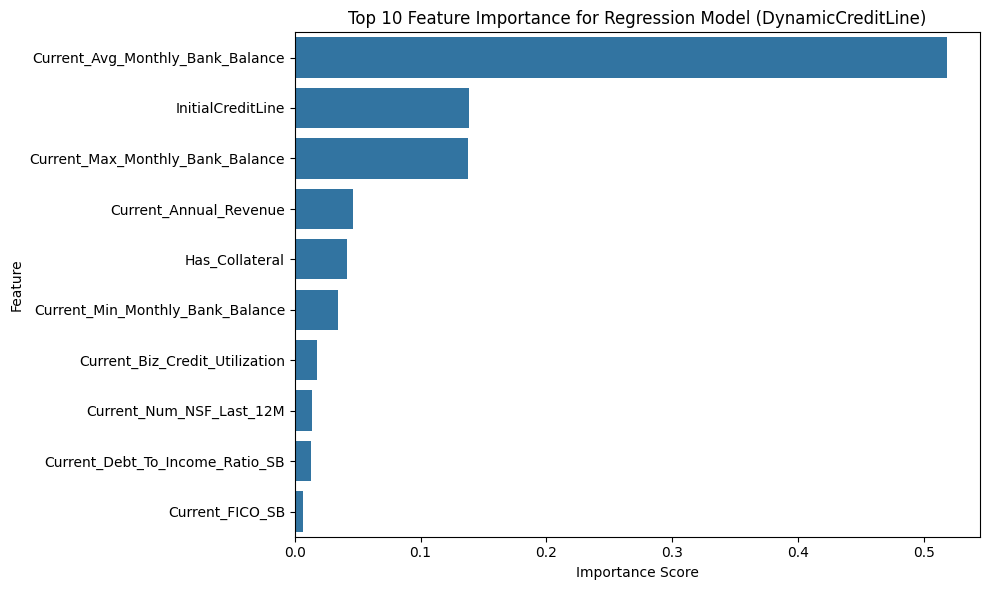


Data exported successfully with new columns and bands to /content/drive/MyDrive/Chau_ACE/Chau_Projects/ML_SMB_DynamicLine/SMB_Dynamic_Credit_Line.csv

Sample Results (First 10 Rows):
  BusinessID  MOB  DynamicCreditLine  AdjustCreditLine  \
0  BUS_00000    1              40500                 1   
1  BUS_00000    2              44500                 1   
2  BUS_00000    3              44000                 1   
3  BUS_00000    4              44500                 1   
4  BUS_00000    5              44000                 1   
5  BUS_00000    6              43000                 1   
6  BUS_00000    7              45000                 1   
7  BUS_00000    8              42000                 1   
8  BUS_00000    9              44000                 1   
9  BUS_00000   10              43500                 1   

   Predicted_AdjustCreditLine  Predicted_DynamicCreditLine  
0                           1                 40148.707031  
1                           1                 43639.734

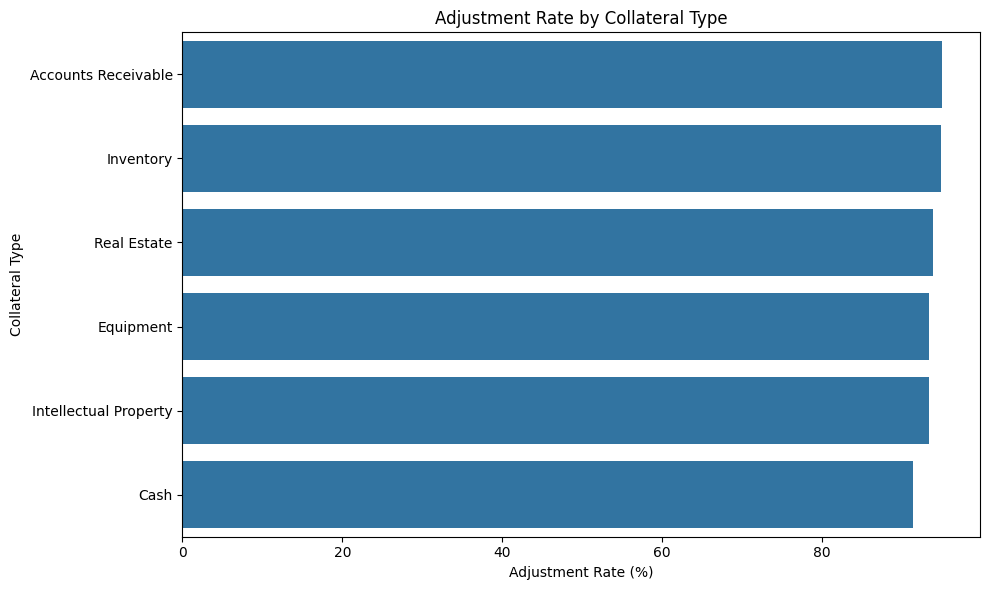

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBClassifier, XGBRegressor

# --- Feature Engineering for Binary Classification ---
# Create the target variable: AdjustCreditLine (1 if DynamicCreditLine changes from previous month, 0 otherwise)
df = df.sort_values(['BusinessID', 'MOB'])  # Sort by BusinessID and Month-on-Book (MOB)
df['Previous_DynamicCreditLine'] = df.groupby('BusinessID')['DynamicCreditLine'].shift(1)
df['AdjustCreditLine'] = (df['DynamicCreditLine'] != df['Previous_DynamicCreditLine']).astype(int)
df['AdjustCreditLine'] = df['AdjustCreditLine'].fillna(0)  # First month for each BusinessID has no previous value

# --- Preprocessing ---
# Define features and target
target_binary = 'AdjustCreditLine'
target_regression = 'DynamicCreditLine'
features = [col for col in df.columns if col not in [target_binary, target_regression, 'Previous_DynamicCreditLine', 'BusinessID']]

# Print initial features
print("\nInitial Features:", features)

# Label encode Industry_Type to create industry_code
label_encoder_industry = LabelEncoder()
df['industry_code'] = label_encoder_industry.fit_transform(df['Industry_Type'])

# Update features to include industry_code instead of Industry_Type
features = [col for col in features if col != 'Industry_Type'] + ['industry_code']

# Identify categorical and numerical columns after updating features
categorical_cols = ['Loan_Purpose', 'Collateral_Type']
numerical_cols = [col for col in features if col not in categorical_cols and col != 'industry_code']

# Print updated feature lists
print("\nUpdated Features:", features)
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)
print("Columns in df:", df.columns.tolist())

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('industry_code_passthrough', 'passthrough', ['industry_code'])
    ],
    remainder='drop'  # Drop any remaining columns not specified
)

# --- Binary Classification Model ---
# Split data for classification
X = df[features]
y_binary = df[target_binary]
X_train, X_temp, y_train_binary, y_temp_binary = train_test_split(X, y_binary, test_size=0.3, random_state=42)
X_val, X_test, y_val_binary, y_test_binary = train_test_split(X_temp, y_temp_binary, test_size=0.5, random_state=42)

# Print columns in X
print("\nColumns in X:", X.columns.tolist())

# Create and train the classification pipeline
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])
clf_pipeline.fit(X_train, y_train_binary)

# Evaluate the classification model
y_val_pred_binary = clf_pipeline.predict(X_val)
print("\nClassification Model Evaluation (Validation Set):")
print(classification_report(y_val_binary, y_val_pred_binary))
print(f"Accuracy: {accuracy_score(y_val_binary, y_val_pred_binary):.4f}")

# Test set evaluation
y_test_pred_binary = clf_pipeline.predict(X_test)
print("\nClassification Model Evaluation (Test Set):")
print(classification_report(y_test_binary, y_test_pred_binary))
print(f"Accuracy: {accuracy_score(y_test_binary, y_test_pred_binary):.4f}")

# --- Visualize Feature Importance for Classification Model ---
# Extract feature importance from XGBoost classifier
feature_importance_clf = clf_pipeline.named_steps['classifier'].feature_importances_

# Get feature names after preprocessing
ohe = clf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, ohe_feature_names, ['industry_code']])

# Create DataFrame for feature importance
clf_feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importance_clf
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=clf_feature_importance_df.head(10))  # Show top 10 features
plt.title('Top 10 Feature Importance for Classification Model (AdjustCreditLine)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Add predictions to the dataframe
df['Predicted_AdjustCreditLine'] = clf_pipeline.predict(X)

# --- Validate Collateral_Type Stability ---
# Check changes in Collateral_Type per BusinessID
collateral_changes = df.groupby('BusinessID')['Collateral_Type'].nunique().reset_index()
collateral_changes.columns = ['BusinessID', 'Unique_Collateral_Values']
unstable_ids = collateral_changes[collateral_changes['Unique_Collateral_Values'] > 1]

print(f"\nNumber of BusinessIDs with unstable Collateral_Type (changes over months): {len(unstable_ids)}")
if not unstable_ids.empty:
    print("\nBusinessIDs with unstable Collateral_Type:")
    print(unstable_ids)

    # Visualize changes for the first unstable BusinessID as an example
    unstable_id_example = unstable_ids['BusinessID'].iloc[0]
    unstable_data = df[df['BusinessID'] == unstable_id_example][['MOB', 'Collateral_Type']]
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='MOB', y=unstable_data['Collateral_Type'].astype('category').cat.codes, data=unstable_data)
    plt.title(f'Collateral_Type Changes Over Time for BusinessID {unstable_id_example}')
    plt.xlabel('Month-on-Book (MOB)')
    plt.ylabel('Collateral_Type (Encoded)')
    plt.grid(True)
    plt.show()

    print(f"\nDetailed Collateral_Type changes for BusinessID {unstable_id_example}:")
    print(unstable_data)

    # Suggest data correction: Set Collateral_Type to the mode value per BusinessID
    df['Collateral_Type'] = df.groupby('BusinessID')['Collateral_Type'].transform(lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0])
    print("\nData corrected: Collateral_Type set to mode value per BusinessID.")
else:
    print("\nNo BusinessIDs with unstable Collateral_Type detected.")

# --- Regression Model for Adjusted Credit Lines ---
# Filter data where adjustment is needed (based on actual or predicted AdjustCreditLine)
df_regression = df[df['Predicted_AdjustCreditLine'] == 1].copy()

# Split data for regression
X_reg = df_regression[features]
y_reg = df_regression[target_regression]
X_train_reg, X_temp_reg, y_train_reg, y_temp_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
X_val_reg, X_test_reg, y_val_reg, y_test_reg = train_test_split(X_temp_reg, y_temp_reg, test_size=0.5, random_state=42)

# Create and train the regression pipeline
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])
reg_pipeline.fit(X_train_reg, y_train_reg)

# Evaluate the regression model
y_val_pred_reg = reg_pipeline.predict(X_val_reg)
print("\nRegression Model Evaluation (Validation Set):")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_val_reg, y_val_pred_reg):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_val_reg, y_val_pred_reg)):.2f}")
print(f"R² Score: {r2_score(y_val_reg, y_val_pred_reg):.4f}")

# Test set evaluation
y_test_pred_reg = reg_pipeline.predict(X_test_reg)
print("\nRegression Model Evaluation (Test Set):")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_reg, y_test_pred_reg):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test_reg, y_test_pred_reg)):.2f}")
print(f"R² Score: {r2_score(y_test_reg, y_test_pred_reg):.4f}")

# --- Visualize Feature Importance for Regression Model ---
# Extract feature importance from XGBoost regressor
feature_importance_reg = reg_pipeline.named_steps['regressor'].feature_importances_

# Create DataFrame for feature importance
reg_feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importance_reg
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=reg_feature_importance_df.head(10))  # Show top 10 features
plt.title('Top 10 Feature Importance for Regression Model (DynamicCreditLine)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Add regression predictions to the regression dataframe
df_regression['Predicted_DynamicCreditLine'] = reg_pipeline.predict(X_reg)

# Merge regression predictions back to the original dataframe
df = df.merge(df_regression[['BusinessID', 'MOB', 'Predicted_DynamicCreditLine']],
              on=['BusinessID', 'MOB'], how='left')

# Save the results to a CSV file
output_path = '/content/drive/MyDrive/Chau_ACE/Chau_Projects/ML_SMB_DynamicLine/SMB_Dynamic_Credit_Line.csv'
df.to_csv(output_path, index=False)

print(f"\nData exported successfully with new columns and bands to {output_path}")

# Display sample results
print("\nSample Results (First 10 Rows):")
print(df[['BusinessID', 'MOB', 'DynamicCreditLine', 'AdjustCreditLine',
          'Predicted_AdjustCreditLine', 'Predicted_DynamicCreditLine']].head(10))
# --- Analyze the Relationship Between Collateral_Type and Predicted_AdjustCreditLine ---
# Group by Collateral_Type and calculate the count of Predicted_AdjustCreditLine (0 or 1)
collateral_analysis = df.groupby('Collateral_Type')['Predicted_AdjustCreditLine'].value_counts().unstack(fill_value=0)
collateral_analysis.columns = ['No Adjustment (0)', 'Adjustment (1)']

# Calculate the total count and adjustment rate for each Collateral_Type
collateral_analysis['Total'] = collateral_analysis['No Adjustment (0)'] + collateral_analysis['Adjustment (1)']
collateral_analysis['Adjustment Rate (%)'] = (collateral_analysis['Adjustment (1)'] / collateral_analysis['Total']) * 100

# Sort by Adjustment Rate for better interpretation
collateral_analysis = collateral_analysis.sort_values(by='Adjustment Rate (%)', ascending=False)

# Display the analysis
print("\nAnalysis of Collateral_Type Impact on Predicted_AdjustCreditLine:")
print(collateral_analysis)

# Visualize the adjustment rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Adjustment Rate (%)', y=collateral_analysis.index, data=collateral_analysis)
plt.title('Adjustment Rate by Collateral Type')
plt.xlabel('Adjustment Rate (%)')
plt.ylabel('Collateral Type')
plt.tight_layout()
plt.show()